#Cars Class Multi Class Classification Model

#IMPORTING LIBRARIES



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")




#Data Cleaning

In [3]:
data = pd.read_csv('cars_class.csv')

In [4]:
data.shape

(719, 20)

In [5]:
data.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [7]:
data['Class'].unique()

array([0, 3, 1, 2])

In [8]:
data.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [10]:
data.describe().style.background_gradient()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,207.701709,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [12]:
data.duplicated().sum()

0

In [14]:
cols = data.columns
cols

Index(['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class'],
      dtype='object')

In [ ]:
#to check different values in each column and its features

for col in cols:
    
    print(data[col].value_counts())  

In [20]:
for col in cols:
    
    print(col,data[col].nunique())  

ID 719
Comp 43
Circ 27
D.Circ 60
Rad.Ra 132
Pr.Axis.Ra 37
Max.L.Ra 21
Scat.Ra 125
Elong 35
Pr.Axis.Rect 13
Max.L.Rect 66
Sc.Var.Maxis 124
Sc.Var.maxis 380
Ra.Gyr 138
Skew.Maxis 39
Skew.maxis 23
Kurt.maxis 38
Kurt.Maxis 29
Holl.Ra 31
Class 4


In [23]:
for col in cols:
    
    print(col,data[col].unique())  

ID [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246

#Data splitting

In [27]:
x = data.iloc[:,1:-1]
y = data.loc[:,'Class']

In [28]:
print(x.shape)
print(y.shape)


(719, 18)
(719,)


In [26]:
x.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201
1,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
3,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
4,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196


In [31]:
print(y.head())
print(y.unique())

0    0
1    3
2    3
3    1
4    2
Name: Class, dtype: int64
[0 3 1 2]


#Training Data to Create a Model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [34]:
print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x_train :  (575, 18)
x_test :  (144, 18)
y_train :  (575,)
y_test :  (144,)


#Standardizing the Model
- their is some outliers in the data 
- which will cause the problem for predicting the model
- so i am using standard scaler method to reduce the outliers in the data

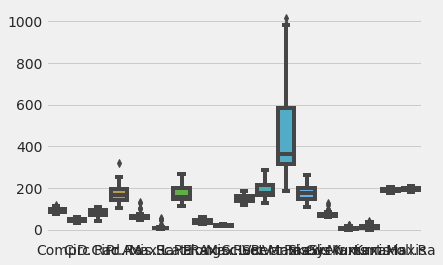

In [35]:
#to check the outliers

sns.boxplot(data = x_train)

In [36]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)

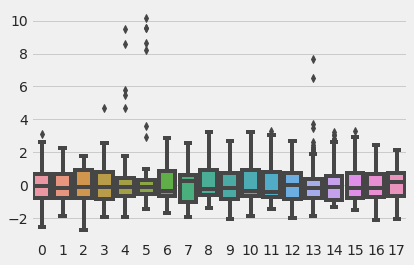

In [37]:
#now the data is standardised 
sns.boxplot(data = x_train)

In [38]:
x_test = ss.transform(x_test)

#Model Creation
- Apply different ML Model Creation to see the result 
- from this we will select which is the best model 
- to create a final model
#Importing all Model Creation Libraries

In [88]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, plot_confusion_matrix,confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [89]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
print('Train Score : ',logreg.score(x_train,y_train))
print('Test Score : ',logreg.score(x_test,y_test))
y_pred = logreg.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred,average=None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))


Train Score :  0.8121739130434783
Test Score :  0.7916666666666666
F1_Score :  [0.92473118 0.52830189 0.68571429 0.91666667]
confusion_matrix :  [[43  0  0  1]
 [ 3 14 11  2]
 [ 1  9 24  1]
 [ 2  0  0 33]]
Precision Score :  [0.87755102 0.60869565 0.68571429 0.89189189]
Recall Score : [0.97727273 0.46666667 0.68571429 0.94285714]
Accuracy_Score :  0.7916666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [90]:
svc = SVC()
svc.fit(x_train,y_train)
print('Train Score : ',svc.score(x_train,y_train))
print('Test Score : ',svc.score(x_test,y_test))
y_pred = svc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred,average=None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))

Train Score :  0.84
Test Score :  0.7708333333333334
F1_Score :  [0.94505495 0.47272727 0.61764706 0.91891892]
confusion_matrix :  [[43  0  0  1]
 [ 2 13 12  3]
 [ 1 12 21  1]
 [ 1  0  0 34]]
Precision Score :  [0.91489362 0.52       0.63636364 0.87179487]
Recall Score : [0.97727273 0.43333333 0.6        0.97142857]
Accuracy_Score :  0.7708333333333334


In [91]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
print('Train Score : ',knn.score(x_train,y_train))
print('Test Score : ',knn.score(x_test,y_test))
y_pred = knn.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred,average= None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))

Train Score :  0.8434782608695652
Test Score :  0.7569444444444444
F1_Score :  [0.93617021 0.47272727 0.63013699 0.87878788]
confusion_matrix :  [[44  0  0  0]
 [ 2 13 14  1]
 [ 1 10 23  1]
 [ 3  2  1 29]]
Precision Score :  [0.88       0.52       0.60526316 0.93548387]
Recall Score : [1.         0.43333333 0.65714286 0.82857143]
Accuracy_Score :  0.7569444444444444


In [92]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print('Train Score : ',dtc.score(x_train,y_train))
print('Test Score : ',dtc.score(x_test,y_test))
y_pred = dtc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred,average= None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))

Train Score :  1.0
Test Score :  0.6944444444444444
F1_Score :  [0.88172043 0.44827586 0.53125    0.79452055]
confusion_matrix :  [[41  1  0  2]
 [ 3 13 12  2]
 [ 2 11 17  5]
 [ 3  3  0 29]]
Precision Score :  [0.83673469 0.46428571 0.5862069  0.76315789]
Recall Score : [0.93181818 0.43333333 0.48571429 0.82857143]
Accuracy_Score :  0.6944444444444444


In [93]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
print('Train Score : ',rfc.score(x_train,y_train))
print('Test Score : ',rfc.score(x_test,y_test))
y_pred = rfc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred,average= None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))

Train Score :  1.0
Test Score :  0.75
F1_Score :  [0.95652174 0.44444444 0.52941176 0.91891892]
confusion_matrix :  [[44  0  0  0]
 [ 1 12 15  2]
 [ 2 12 18  3]
 [ 1  0  0 34]]
Precision Score :  [0.91666667 0.5        0.54545455 0.87179487]
Recall Score : [1.         0.4        0.51428571 0.97142857]
Accuracy_Score :  0.75


In [94]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print('Train Score : ',gbc.score(x_train,y_train))
print('Test Score : ',gbc.score(x_test,y_test))
y_pred = gbc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred,average= None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))

Train Score :  0.9982608695652174
Test Score :  0.7361111111111112
F1_Score :  [0.97777778 0.40677966 0.47761194 0.94444444]
confusion_matrix :  [[44  0  0  0]
 [ 1 12 16  1]
 [ 1 16 16  2]
 [ 0  1  0 34]]
Precision Score :  [0.95652174 0.4137931  0.5        0.91891892]
Recall Score : [1.         0.4        0.45714286 0.97142857]
Accuracy_Score :  0.7361111111111112


In [95]:
gb = GaussianNB()
gb.fit(x_train,y_train)
print('Train Score : ',gb.score(x_train,y_train))
print('Test Score : ',gb.score(x_test,y_test))
y_pred = gb.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred,average=None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))

Train Score :  0.4782608695652174
Test Score :  0.4444444444444444
F1_Score :  [0.19607843 0.47619048 0.44067797 0.53913043]
confusion_matrix :  [[ 5  6  2 31]
 [ 0 15  7  8]
 [ 0 12 13 10]
 [ 2  0  2 31]]
Precision Score :  [0.71428571 0.45454545 0.54166667 0.3875    ]
Recall Score : [0.11363636 0.5        0.37142857 0.88571429]
Accuracy_Score :  0.4444444444444444


In [96]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
print('Train Score : ',sgd.score(x_train,y_train))
print('Test Score : ',sgd.score(x_test,y_test))
y_pred = sgd.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred,average=None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))

Train Score :  0.7634782608695653
Test Score :  0.7222222222222222
F1_Score :  [0.92473118 0.44444444 0.49180328 0.90140845]
confusion_matrix :  [[43  0  0  1]
 [ 3 14 11  2]
 [ 1 18 15  1]
 [ 2  1  0 32]]
Precision Score :  [0.87755102 0.42424242 0.57692308 0.88888889]
Recall Score : [0.97727273 0.46666667 0.42857143 0.91428571]
Accuracy_Score :  0.7222222222222222


#Out of all the Model Random Forest classifier is the best Model
- so the final model will be created on Random Forest Classifier

#Hyperparameter Tuning
- will be created based on RandomForestClassifier
- to find the best tuning parameters for the model we either use Randomized or Grid Search SV


In [97]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [109]:
param_dist = {'max_depth':[3,6,9], 'min_samples_leaf':[3,5,7],'criterion':['gini','entropy','log_loss'],'n_estimators':[100,10]}

In [108]:
rscv = RandomizedSearchCV(rfc,param_distributions = param_dist,n_iter = 27,cv = 5)
rscv.fit(x_train,y_train)
print('Best Parameters : ',rscv.best_params_)
print('Best Estimator : ',rscv.best_estimator_)
print('RSCV Test Score : ',rscv.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

Best Parameters :  {'n_estimators': 100, 'min_samples_leaf': 3, 'max_depth': 6, 'criterion': 'gini'}
Best Estimator :  RandomForestClassifier(max_depth=6, min_samples_leaf=3)
RSCV Test Score :  0.7569444444444444


In [110]:
gs = GridSearchCV(rfc,param_grid=param_dist,cv = 5)
gs.fit(x_train,y_train)
print('Best Parameters : ',gs.best_params_)
print('Best Estimator : ',gs.best_estimator_)
print('RSCV Test Score : ',gs.score(x_test,y_test))
print('RSCV best Score : ',gs.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

Best Parameters :  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 100}
Best Estimator :  RandomForestClassifier(max_depth=9, min_samples_leaf=3)
RSCV Test Score :  0.75
RSCV best Score :  0.7460869565217391


#Visualize feature scores of the features

In [111]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth=9, min_samples_leaf= 3, n_estimators= 100)
rfc.fit(x_train,y_train)
print('Train Score : ',rfc.score(x_train,y_train))
print('Test Score : ',rfc.score(x_test,y_test))
y_pred = rfc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred,average= None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))

Train Score :  0.9808695652173913
Test Score :  0.7569444444444444
F1_Score :  [0.95652174 0.49122807 0.52307692 0.91891892]
confusion_matrix :  [[44  0  0  0]
 [ 1 14 13  2]
 [ 2 13 17  3]
 [ 1  0  0 34]]
Precision Score :  [0.91666667 0.51851852 0.56666667 0.87179487]
Recall Score : [1.         0.46666667 0.48571429 0.97142857]
Accuracy_Score :  0.7569444444444444


In [147]:
x_train.shape

(575, 18)

In [146]:
colss = ['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra']
feature_scores = pd.Series(rfc.feature_importances_, index=colss).sort_values(ascending=False)

feature_scores

Max.L.Ra        0.128859
Sc.Var.maxis    0.079392
Max.L.Rect      0.077922
D.Circ          0.075444
Elong           0.068048
Sc.Var.Maxis    0.067004
Scat.Ra         0.060081
Comp            0.054147
Rad.Ra          0.052142
Holl.Ra         0.051476
Skew.Maxis      0.051109
Pr.Axis.Ra      0.043071
Skew.maxis      0.036588
Kurt.maxis      0.032019
Ra.Gyr          0.031921
Kurt.Maxis      0.031615
Pr.Axis.Rect    0.029902
Circ            0.029260
dtype: float64

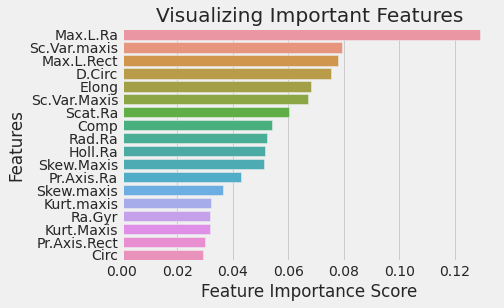

In [148]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [150]:
x.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201
1,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
3,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
4,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196


#Final Model Building Using Random Forest Model on Selected Features

In [152]:
column = ['Kurt.maxis','Ra.Gyr','Kurt.Maxis','Pr.Axis.Rect','Circ']
x = x.drop(column,axis=1)

In [154]:
x.shape

(719, 13)

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 10)

In [160]:
print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x_train :  (575, 13)
x_test :  (144, 13)
y_train :  (575,)
y_test :  (144,)


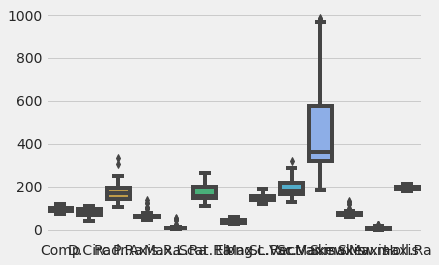

In [161]:
#to check the outliers

sns.boxplot(data = x_train)

In [162]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

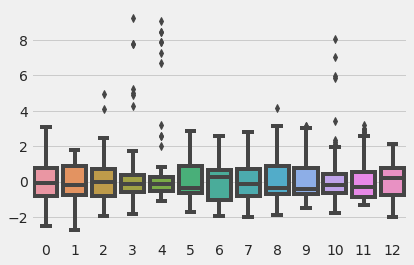

In [163]:
#now the data is standardised 
sns.boxplot(data = x_train)

In [177]:
rfc = RandomForestClassifier(criterion= 'gini', max_depth=9, min_samples_leaf= 3, n_estimators= 100)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print('Train Score : ',rfc.score(x_train,y_train))
print('Test Score : ',rfc.score(x_test,y_test))
print('F1_Score : ',f1_score(y_test,y_pred,average= None))
print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred,average= None))
print("Recall Score :" , recall_score(y_test, y_pred,average= None))
print('Accuracy_Score : ', accuracy_score(y_test, y_pred))

Train Score :  0.951304347826087
Test Score :  0.8194444444444444
F1_Score :  [0.97222222 0.63636364 0.56603774 0.96907216]
confusion_matrix :  [[35  0  0  0]
 [ 2 21  9  0]
 [ 0 12 15  1]
 [ 0  1  1 47]]
Precision Score :  [0.94594595 0.61764706 0.6        0.97916667]
Recall Score : [1.         0.65625    0.53571429 0.95918367]
Accuracy_Score :  0.8194444444444444


#Scores of Random Forest Classifier Final model

- If u see the the tuning model with orginal data we got 75%
- But using feature score method we removed some 5 Unwanted columns
- Now in our model our Score got Inceased by 82%

In [165]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       0.66      0.59      0.62        32
           2       0.61      0.61      0.61        28
           3       0.96      0.96      0.96        49

    accuracy                           0.82       144
   macro avg       0.79      0.79      0.79       144
weighted avg       0.81      0.82      0.82       144



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


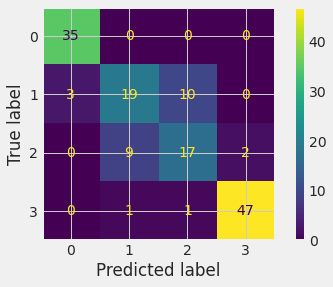

In [166]:
print(classification_report(y_test, y_pred))
plot_confusion_matrix(rfc,x_test,y_test)

#Results and conclusion
Table of Contents

* In this project, I build a Random Forest Classifier to predict the Class of the cars. I build a models with 100 decision-trees.
* The model accuracy score with Orginal Features the 100 decision-trees is     0.7569 but the same with 100 decision-trees with 13 features after reduction of the least score features the score is 0.8194. So, as expected accuracy increases with number of decision-trees and Important Feature Selection in the model.
* I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is Max.L.Ra and least important feature is Kurt.maxis,Ra.Gyr,Kurt.Maxis,Pr.Axis.Rect,Circ.
* I have removed the ['Kurt.maxis','Ra.Gyr','Kurt.Maxis','Pr.Axis.Rect','Circ'] variable from the model, rebuild it and checked its accuracy. The accuracy of the model with ['Kurt.maxis','Ra.Gyr','Kurt.Maxis','Pr.Axis.Rect','Circ'] variable removed is 0.8194. The accuracy of the model with all the variables taken into account is 0.7569. So, we can see that the model accuracy has been improved with ['Kurt.maxis','Ra.Gyr','Kurt.Maxis','Pr.Axis.Rect','Circ'] variable removed from the model.
* Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.